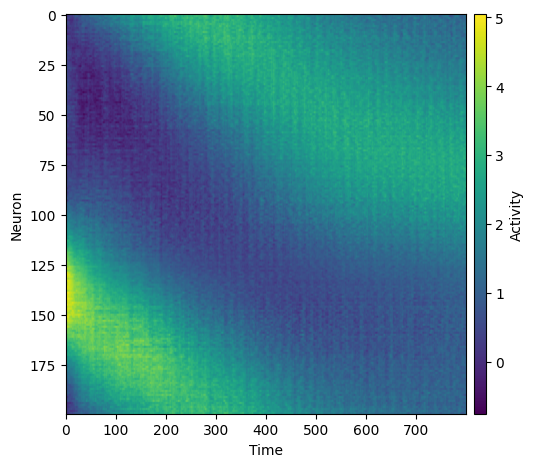

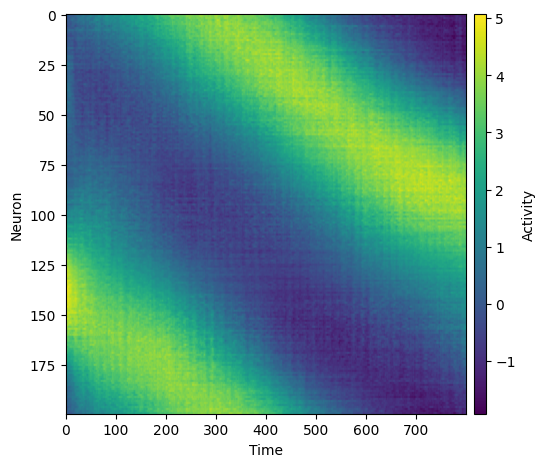

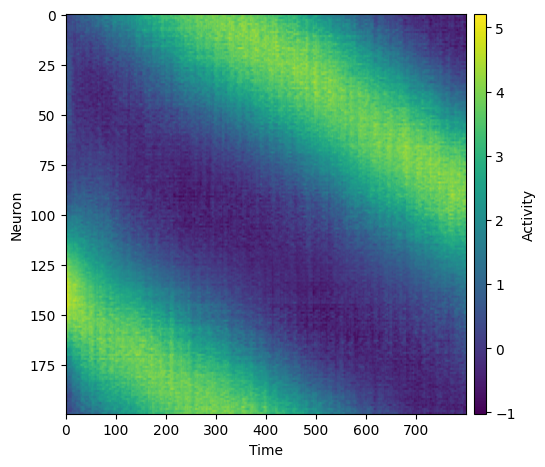

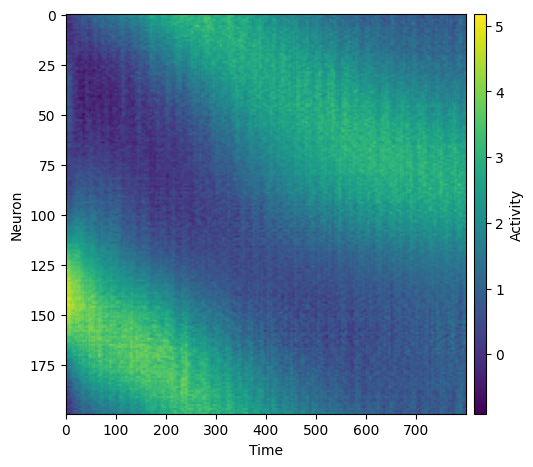

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

iloop = 14 #testing loop

# Simulation identifiers (change it according to your codes)
idx = 9
pqif = 0.5

simulations = [i for i in range(9, 13)]

for idx in simulations:

    # Load neuron permutation used to generate targets
    # The permutation was saved as a string in the target parameters file
    neuron_order_str = (
        pd.read_csv(f'simulation_{idx}/simulation_{idx}_targets_parametros.csv')
        ['sequence_order'][0]
    )

    # Convert the string representation to a NumPy array
    neuron_order = np.fromstring(
        neuron_order_str.strip("[]"),
        sep=" ",
        dtype=int
    )

    # Inverse permutation: used to reorder neurons so that the sequence
    # appears smooth and ordered when plotting
    inv_order = np.argsort(neuron_order)

    # Load simulation data
    target = pd.read_csv(
        f'simulation_{idx}/simulation_{idx}_targets_{pqif}.csv'
    ).values

    inputs = pd.read_csv(
        f'simulation_{idx}/simulation_{idx}_inputs/'
        f'simulation_{idx}_inputs_pqif_{pqif}_iloop_{iloop}_seed_0.csv',
        header=None
    ).values

    outputs = pd.read_csv(
        f'simulation_{idx}/simulation_{idx}_outputs/'
        f'simulation_{idx}_outputs_pqif_{pqif}_iloop_{iloop}_seed_0.csv',
        header=None
    ).values

    pretrain_inputs = pd.read_csv(
        f'simulation_{idx}/simulation_{idx}_inputs/'
        f'simulation_{idx}_inputs_pqif_{pqif}_iloop_0_seed_0.csv',
        header=None
    ).values

    # Discard initial transient (200 ms)
    inputs_rest = np.nan_to_num(inputs[200:, :])
    target_rest = np.nan_to_num(target[200:, :])
    pretrain_rest = np.nan_to_num(pretrain_inputs[200:, :])
    outputs_rest = np.nan_to_num(outputs[200:, :])

    # Shared color scale
    vmin = min(pretrain_rest.min(), inputs_rest.min(), target_rest.min())
    vmax = max(pretrain_rest.max(), inputs_rest.max(), target_rest.max())

    # Figure setup
    # square_size = 1.2
    square_size = 4
    fig = plt.figure(figsize=(square_size, square_size))

    # Manually place the main axes
    ax = fig.add_axes([
        0.15,
        0.12,
        square_size / fig.get_figwidth(),
        square_size / fig.get_figheight()
    ])

    # Reorder neurons for visualization
    # Applying the inverse permutation makes the sequence appear smooth
    # and ordered. Here we use `inputs_rest`, but the same operation can be
    # applied to `target_rest` or `outputs_rest` in exactly the same way.
    inputs_ordered = inputs_rest.T[inv_order, :]

    # Examples:
    # targets_ordered = target_rest.T[inv_order, :]
    # outputs_ordered = outputs_rest.T[inv_order, :]

    # Plot
    im = ax.imshow(
        inputs_ordered,
        cmap='viridis',
        aspect='auto',
        vmin=vmin,
        vmax=vmax
    )

    ax.set_xlabel('Time')
    ax.set_ylabel('Neuron')

    # Colorbar aligned with the main axes
    pos = ax.get_position()
    cbar_ax = fig.add_axes([pos.x1 + 0.02, pos.y0, 0.03, pos.height])
    cbar = fig.colorbar(im, cax=cbar_ax, orientation='vertical')
    cbar.set_label('Activity')

    plt.show()